# ANALYZE BIOMODELS SUBNETS

In [1]:
import pySubnetSB.constants as cn
from pySubnetSB.network import Network

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tellurium as te
from typing import List

# Data Preparation

In [2]:
#PATH = os.path.join(cn.PROJECT_DIR, "biomodels_subnets.csv")
STRONG_DF = pd.read_csv(cn.SUBNET_BIOMODELS_STRONG_PATH).sort_values([cn.FINDER_REFERENCE_NAME, cn.FINDER_TARGET_NAME])
STRONG_DF = STRONG_DF.reset_index()
WEAK_DF = pd.read_csv(cn.SUBNET_BIOMODELS_WEAK_PATH).sort_values([cn.FINDER_REFERENCE_NAME, cn.FINDER_TARGET_NAME])
SUMMARY_DF = pd.read_csv(cn.BIOMODELS_SUMMARY_PATH).sort_values(cn.D_MODEL_NAME)
WEAK_DF = WEAK_DF.reset_index()

In [3]:
STRONG_DF.head()

,index,reference_name,target_name,reference_network,induced_network,name_dct,num_assignment_pair,is_truncated,probability_of_occurrence_strong,truncated_strong,probability_of_occurrence_weak,trunceated_weak,estimated_poc_strong,estimated_poc_weak
0,854,BIOMD0000000006,BIOMD0000000067,"BIOMD0000000006: 4 species, 3 reactions\n Rea...","63242: 4 species, 3 reactions\n V_Pta: AcCoA ...","{""species_names"": {""EmptySet"": ""AcCoA"", ""u"": ""...",15.0,False,NaN,NaN,NaN,NaN,0.0,0.0
1,703,BIOMD0000000006,BIOMD0000000715,"BIOMD0000000006: 4 species, 3 reactions\n Rea...","2006010: 4 species, 3 reactions\n reaction_3:...","{""species_names"": {""EmptySet"": ""S"", ""u"": ""I"", ...",6.0,False,NaN,NaN,NaN,NaN,0.0,0.0
2,298,BIOMD0000000006,BIOMD0000000848,"BIOMD0000000006: 4 species, 3 reactions\n Rea...","9239969: 4 species, 3 reactions\n Uninfected_...","{""species_names"": {""EmptySet"": ""T"", ""u"": ""R"", ...",18.0,False,NaN,NaN,NaN,NaN,0.0,0.0
3,793,BIOMD0000000027,BIOMD0000000170,"BIOMD0000000027: 5 species, 4 reactions\n v1:...","4369297: 5 species, 4 reactions\n BMAL1_nucle...","{""species_names"": {""M"": ""y5"", ""Mp"": ""y6"", ""Mpp...",24.0,False,0.0,0.0,0.0,0.0,0.0,0.0
4,1029,BIOMD0000000027,BIOMD0000000228,"BIOMD0000000027: 5 species, 4 reactions\n v1:...","3434857: 5 species, 4 reactions\n pRB_phospho...","{""species_names"": {""M"": ""pRB"", ""Mp"": ""pRBp"", ""...",60.0,False,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
WEAK_DF.head()

,index,reference_name,target_name,reference_network,induced_network,name_dct,num_assignment_pair,is_truncated,probability_of_occurrence_strong,truncated_strong,probability_of_occurrence_weak,trunceated_weak,estimated_poc_strong,estimated_poc_weak
0,1301,BIOMD0000000006,BIOMD0000000067,"BIOMD0000000006: 4 species, 3 reactions\n Rea...","7954902: 4 species, 3 reactions\n V_Pta: AcCo...","{""species_names"": {""EmptySet"": ""AcCoA"", ""u"": ""...",15.0,False,NaN,NaN,NaN,NaN,0.0,0.0
1,1218,BIOMD0000000006,BIOMD0000000715,"BIOMD0000000006: 4 species, 3 reactions\n Rea...","7360183: 4 species, 3 reactions\n reaction_3:...","{""species_names"": {""EmptySet"": ""S"", ""u"": ""I"", ...",6.0,False,NaN,NaN,NaN,NaN,0.0,0.0
2,782,BIOMD0000000006,BIOMD0000000848,"BIOMD0000000006: 4 species, 3 reactions\n Rea...","7617882: 4 species, 3 reactions\n Uninfected_...","{""species_names"": {""EmptySet"": ""T"", ""u"": ""R"", ...",18.0,False,NaN,NaN,NaN,NaN,0.0,0.0
3,0,BIOMD0000000027,BIOMD0000000170,"BIOMD0000000027: 5 species, 4 reactions\n v1:...","8615539: 5 species, 4 reactions\n BMAL1_nucle...","{""species_names"": {""M"": ""y5"", ""Mp"": ""y6"", ""Mpp...",24.0,False,0.0,0.0,0.0,0.0,0.0,0.0
4,945,BIOMD0000000027,BIOMD0000000228,"BIOMD0000000027: 5 species, 4 reactions\n v1:...","3682315: 5 species, 4 reactions\n pRB_phospho...","{""species_names"": {""M"": ""pRB"", ""Mp"": ""pRBp"", ""...",60.0,False,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
SUMMARY_DF.head()

,model_name,num_reaction,num_species,probability_of_occurrence_strong,probability_of_occurrence_weak,trunceated_weak,truncated_strong,is_boundary_network
890,BIOMD0000000001,17,12,NaN,NaN,NaN,NaN,False
430,BIOMD0000000002,17,13,NaN,NaN,NaN,NaN,False
920,BIOMD0000000003,7,3,0.0,0.0,0.0,0.0,True
115,BIOMD0000000004,7,5,0.0,0.0,0.0,0.0,False
572,BIOMD0000000005,9,9,0.0,0.0,0.0,0.0,False


In [6]:
def makeMergeColumnName(column:str, is_reference:bool=True)->str:
    """
    Creates column names for merged result of subnet dataframe with summary dataframe.
    """
    if is_reference:
        suffix = "_reference"
    else:
        suffix = "_induced"
    return column + "_reference"

In [7]:
# Augment the subnet information with the reference num_reaction, num_species
def mergeWithSummary(subnet_df:pd.DataFrame=STRONG_DF)->pd.DataFrame:
    """
    Augment the subnet dataframe with summary information for reference network.
    """
    df = subnet_df.merge(SUMMARY_DF, right_on='model_name', left_on='reference_name',
                        suffixes=["_induced", "_reference"])
    df = df.reset_index()
    del df['index']
    drops = df['reference_name'] == 'something'
    df = df[~drops]
    df = df.reset_index()
    return df
#
df = mergeWithSummary()
assert(len([c for c in df.columns if "_reference" in c]) > 0)
assert(len([c for c in df.columns if "_induced" in c]) > 0)
assert(len(df) <= len(STRONG_DF))
print("OK!")

OK!


In [8]:
STRONG_DF = mergeWithSummary(STRONG_DF)
WEAK_DF = mergeWithSummary(WEAK_DF)

## Check for duplicates

**REMOVE DUPLICATES**

# Helpers

In [9]:
def makeTestDataFrame():
    df = pd.DataFrame({'reference_name': [0, 1, 1, 2, 2, 2], 'target_name': [0, 1, 1, 2, 2, 2]})
    return df.astype(str)
TEST_NUM_DUPLICATE = 5

In [10]:
def makeAntimony(model_name:str, is_reference:bool=True, subnet_df:pd.DataFrame=STRONG_DF, is_roadrunner_loadable:bool=False):
    """
    Transforms the string in a "network" cell into an antimony model
    """
    if is_reference:
        name_col = 'reference_name'
        network_col = 'reference_network'
    else:
        name_col = 'target_name'
        network_col = 'induced_network'
    models =  subnet_df[subnet_df[name_col] == model_name][network_col].values
    if len(models) == 0:
        return None
    model = models[0]
    if is_roadrunner_loadable:
        pos = model.index('tions\n')
        model = model[pos+7:]
        model = model.replace('\n', ';1\n')
        model += ";1;"
    return model

# TESTS
model = makeAntimony('BIOMD0000000224', is_roadrunner_loadable=True)
rr = te.loada(model)
model = makeAntimony('BIOMD0000000030')
assert(model is None)
print("OK!")

OK!


In [11]:
def extractBiomodelNum(stg:str)->int:
    """
    Extracts the number from the biomodels name.
    """
    substg = stg[5:]
    pos = np.min([n if c != '0' else 1000 for n, c in enumerate(substg)])
    try:
        result = int(substg[pos:])
    except:
        result = None
    return result

# TESTS
num = extractBiomodelNum('BIOMD0000000030')
assert(num == 30)
num = extractBiomodelNum('BIOMD0000002030')
assert(num == 2030)
print("OK!")

OK!


In [12]:
def checkDuplicates(df:pd.DataFrame, is_print:bool=True)->list:
    """
    Checks if elements are duplicated
    """
    keys = list(df['reference_name'] + df['target_name'])
    duplicates = []
    if len(keys) > len(set(keys)):
        duplicates = [k for k in keys if keys.count(k) > 1]
        if is_print:
            print(f"**Duplicate entries: {duplicates}")
    else:
        if is_print:
            print("**No duplicate entries")
    return duplicates

count = len(checkDuplicates(makeTestDataFrame(), is_print=False))
assert(count == TEST_NUM_DUPLICATE)
print("OK!")

OK!


In [13]:
def removeDuplicates(df:pd.DataFrame)->pd.DataFrame:
    """
    Remove rows where the reference_name + target_name is duplicated.

    Args:
        df: dataframe procesed

    Returns:
        DataFrame w/o duplicates
    """
    keys = np.array(df['reference_name'].astype(str) + df['target_name'].astype(str))
    all_positions = np.array(range(len(keys)))
    drop_idxs = []
    for key in set(keys):
        key_positions = all_positions[keys == key]
        drop_idxs.extend(key_positions[:-1])
    result_df = df.drop(drop_idxs)
    return result_df

# TESTS
df = makeTestDataFrame()
result_df = removeDuplicates(df)
assert(len(result_df) == 3)
print("OK!")   

OK!


In [14]:
def getTargetNames(reference_name:str, subnet_df:pd.DataFrame=STRONG_DF)->List[str]:
    """
    Gets the list of target names for the reference, if any.

    Args:
       reference_name: str

    Returns:
       list-str
    """
    sel = subnet_df["reference_name"] == reference_name
    if np.sum(sel) == 0:
        return None
    target_names = subnet_df[sel]["target_name"].values
    return target_names

# Tests
names = getTargetNames("BIOMD0000000224")
assert(len(names) > 0)
names = getTargetNames("BIOMD000000022x")
assert(names is None)
print("OK!")

OK!


# Probability of Occurrence of Reference Networks

Calculation of the POC of networks with weak and strong identity to the BioModels reference networks (those with number reactions <= 10)

In [15]:
# Heat map: x-num_species, y-num_reaction, color - POC or -log10 POC

In [16]:
pivot_df = SUMMARY_DF.pivot_table(values=cn.D_PROBABILITY_OF_OCCURRENCE_STRONG,
                                 index=cn.D_NUM_REACTION, columns=cn.D_NUM_SPECIES, aggfunc='median')
pivot_df

num_species,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
num_reaction,,,,,,,,,,,,,,,,,
1,0.099195,0.508790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.027220,0.005380,0.057875,0.00707,0.02127,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.005510,0.002130,0.000245,0.00276,0.00000,0.00002,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.000960,0.000260,0.000000,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,0.000110,0.000055,0.00000,0.00000,0.00002,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,0.000005,0.000000,0.00000,0.00000,0.00000,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,0.000000,0.000000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,0.000000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.0,NaN
9,NaN,NaN,0.000000,0.00000,0.00000,0.00000,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN


In [17]:
pivot_df = pivot_df.map(lambda x: max(x, 1e-5))
pivot_log10_df = pivot_df.map(lambda x: -np.log10(x))
pivot_log10_df

num_species,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
num_reaction,,,,,,,,,,,,,,,,,
1,1.003510,0.293461,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.565112,2.269218,1.237509,2.150581,1.672233,5.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.258848,2.671620,3.610834,2.559091,5.000000,4.69897,5.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.017729,3.585027,5.000000,5.000000,5.000000,5.00000,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,3.958607,4.259637,5.000000,5.000000,4.69897,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,5.000000,5.000000,5.000000,5.000000,5.00000,5.0,5.0,NaN,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,5.000000,5.000000,5.000000,5.000000,5.00000,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,5.000000,5.000000,5.000000,5.00000,5.0,5.0,5.0,5.0,NaN,5.0,5.0,NaN,NaN,5.0,NaN
9,NaN,NaN,5.000000,5.000000,5.000000,5.00000,5.0,5.0,5.0,5.0,5.0,NaN,5.0,NaN,NaN,NaN,NaN


In [18]:
def plotModelPOC(is_strong:bool=True, is_plot:bool=True):
    if is_strong:
        column = cn.D_PROBABILITY_OF_OCCURRENCE_STRONG
        adjective = 'Strong'
    else:
        column = cn.D_PROBABILITY_OF_OCCURRENCE_WEAK
        adjective = 'Weak'
    pivot_df = SUMMARY_DF.pivot_table(values=column,
                    index=cn.D_NUM_REACTION, columns=cn.D_NUM_SPECIES, aggfunc='median')
    pivot_df = pivot_df.map(lambda x: max(x, 1e-5))
    pivot_df = pivot_df.map(lambda x: -np.log10(x))
    pivot_df.sort_index(level=0, ascending=False, inplace=True)
    if is_plot:
        sns.heatmap(pivot_df, annot=True, fmt="1.1f", cmap="coolwarm", vmin=0, vmax=5,
              annot_kws={'size': 8},
              cbar_kws={'label': '-log10 Probability of occurrence'})
        plt.title(f"{adjective} Identity")
# Test
plotModelPOC(is_strong=True, is_plot=False)
print("OK!")

OK!


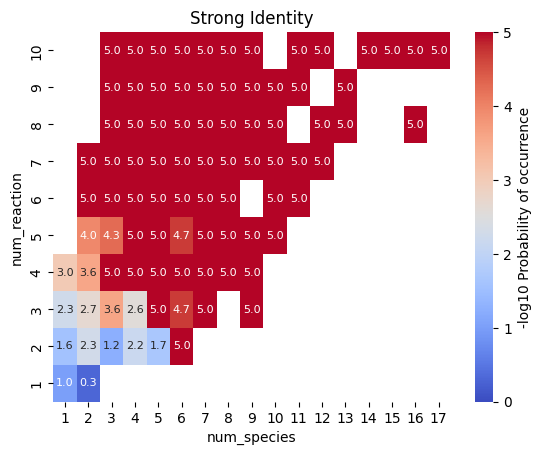

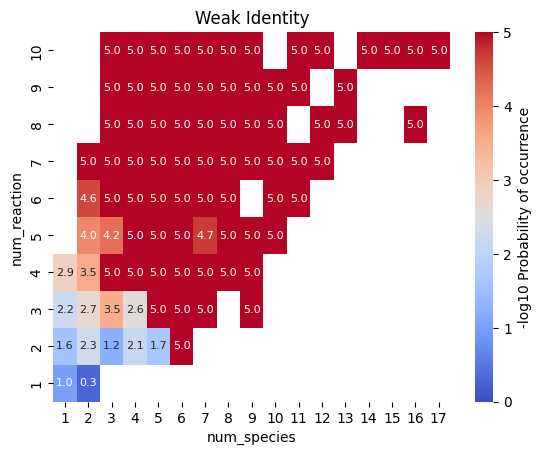

In [19]:
plotModelPOC(is_strong=True)
plt.figure()
plotModelPOC(is_strong=False)

# POC of Induced Networks

In [30]:
# Scatter plot of subnets
def plotInducedByModelNumber(subnet_df:pd.DataFrame=STRONG_DF, significance:float=0.001, is_plot:bool=True)->List[str]:
    """
    Scatter plot of reference vs. target by increasing model number filtered by the POC significance of the reference.
    """
    filtered_subnet_df = subnet_df [subnet_df[makeMergeColumnName(cn.D_PROBABILITY_OF_OCCURRENCE_STRONG)] < significance]
    reference_names = list(set(filtered_subnet_df[cn.FINDER_REFERENCE_NAME]))
    xvals = [extractBiomodelNum(m) for m in filtered_subnet_df['reference_name']]
    yvals = [extractBiomodelNum(m) for m in filtered_subnet_df['target_name']]
    if is_plot:
        plt.scatter(xvals, yvals)
        plt.plot([0,1000], [0, 1000], c='red')
        plt.xlim([140, 160])
    reference_names = sorted(reference_names, key=lambda x: extractBiomodelNum(x))
    return reference_names

# Tests
count = len(plotInducedByModelNumber(significance=1, is_plot=False))
assert(count > 0)
print("OK!")

OK!


In [21]:
STRONG_DF [STRONG_DF['reference_name'] == 'something']

,index,level_0,reference_name,target_name,reference_network,induced_network,name_dct,num_assignment_pair,is_truncated,probability_of_occurrence_strong_induced,...,estimated_poc_strong,estimated_poc_weak,model_name,num_reaction,num_species,probability_of_occurrence_strong_reference,probability_of_occurrence_weak_reference,trunceated_weak_reference,truncated_strong_reference,is_boundary_network


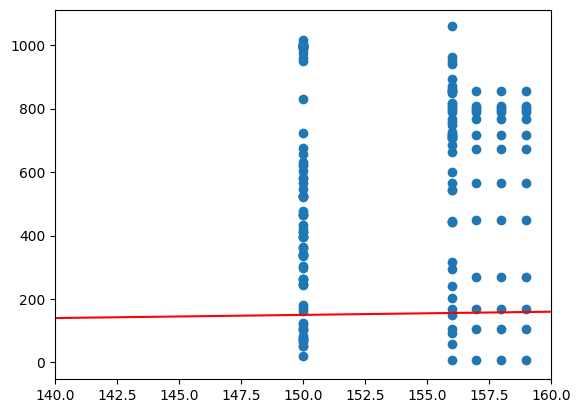

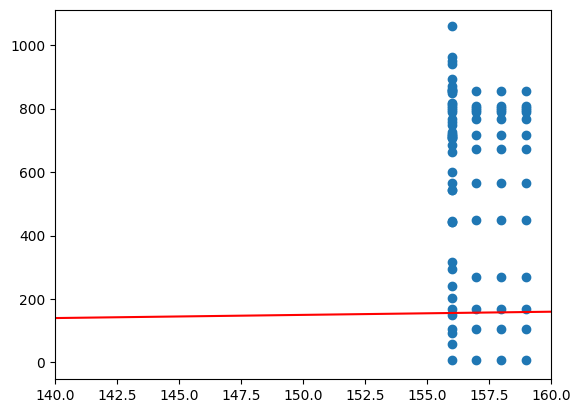

In [22]:
_ = plotInducedByModelNumber(subnet_df=STRONG_DF, significance=1)
plt.figure()
SIGNIFICANT_REFERENCE_NAMES = plotInducedByModelNumber(subnet_df=STRONG_DF, significance=0.0001)

In [23]:
len(SIGNIFICANT_REFERENCE_NAMES)

54

# CDF of Number of targets per reference

# Analysis

In [24]:
# Number of targets
#if "reference_model" in SUBNET_DF.columns:
#    SUBNET_DF = SUBNET_DF.rename(columns={'reference_model': 'reference_name', 'target_model': 'target_name'})
xvals = [extractBiomodelNum(s) for s in SUBNET_DF['reference_name'] if extractBiomodelNum(s) is not None]
_ = plt.hist(xvals, bins=100)
_ = plt.xticks(rotation=45)
plt.xlabel('reference model')
plt.ylabel('number induced models')
plt.title('Strong Identity Subnets in BioModels. Reference model <= 10 Reactions.')

NameError: name 'SUBNET_DF' is not defined

In [ ]:
# Scatter plot of subnets
xvals = [extractBiomodelNum(m) for m in STRONG_DF['reference_name']]
yvals = [extractBiomodelNum(m) for m in STRONG_DF['target_name']]
plt.scatter(xvals, yvals)
#plt.xlim([0, 300])
#plt.ylim([0, 300])
plt.plot([0,1000], [0, 1000], c='red')

Above the red line are target odels that embed an existing reference model. Below the red line indicate common motif without reuse. The dots below indicate opportunities for reuse.

In [ ]:
SUBNET_DF.to_csv("subnet.csv")

In [32]:
print(makeAntimony('BIOMD0000000150'))

BIOMD0000000150: 4 species, 2 reactions
  Binding: CyclinA + Cdk2 -> CDK2cycA
  Activation: CDK2cycA -> CDK2cycA_star_


In [36]:
SUMMARY_DF [ SUMMARY_DF['model_name'] == 'BIOMD0000000150']

,model_name,num_reaction,num_species,probability_of_occurrence_strong,probability_of_occurrence_weak,trunceated_weak,truncated_strong,is_boundary_network
498,BIOMD0000000150,2,4,0.01931,0.02029,0.0,0.0,False


In [25]:
# Print all of the reference models that appear in targets
for name in SIGNIFICANT_REFERENCE_NAMES:
    result = makeAntimony(name)
    if result is not None:
        print(result + '\n\n')

BIOMD0000000006: 4 species, 3 reactions
  Reaction1: EmptySet -> z
  Reaction2: u -> EmptySet
  Reaction3: z -> u


BIOMD0000000027: 5 species, 4 reactions
  v1: M -> Mp
  v2: Mp -> Mpp
  v3: Mpp -> Mp
  v4: Mp -> M


BIOMD0000000031: 6 species, 4 reactions
  v1: M -> Mp
  v2: Mp -> Mpp
  v3: Mpp -> Mp
  v4: Mp -> M


BIOMD0000000104: 6 species, 2 reactions
  reaction_0: species_0 -> species_1
  reaction_1: species_1 -> species_4


BIOMD0000000121: 6 species, 5 reactions
  reaction_0000001: c3 -> c2
  reaction_0000002: c2 -> c1
  reaction_0000003: c1 -> o
  reaction_0000004: o -> i
  reaction_0000005: c1 -> i


BIOMD0000000156: 3 species, 5 reactions
  R1:  -> x
  R3: x -> 
  R4:  -> y0
  R5: y0 -> y
  R6: y -> 


BIOMD0000000157: 3 species, 6 reactions
  R1:  -> x
  R2: x -> 
  R3: x -> 
  R4:  -> y0
  R5: y0 -> y
  R6: y -> 


BIOMD0000000158: 3 species, 6 reactions
  R1:  -> x
  R2: x -> 
  R3: x -> 
  R4:  -> y0
  R5: y0 -> y
  R6: y -> 


BIOMD0000000159: 3 species, 6 reactions
  

# Notes

1. Look for targets with multiple reference submodels.
2. Find interesting plots for paper
3. Do Weak and Strong identities
4. Scatter plot of reference (x) vs. target (y) ordered by BioModels number. Horizontal indicates subnets for same target. Vertical is targets for same reference.